In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt=pd.read_csv("data_clean.csv")
print(dt)

     Unnamed: 0  Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
0             1   41.0    190.0   7.4     67     5    1  2010    67       S
1             2   36.0    118.0   8.0     72     5    2  2010    72       C
2             3   12.0    149.0  12.6     74     5    3  2010    74      PS
3             4   18.0    313.0  11.5     62     5    4  2010    62       S
4             5    NaN      NaN  14.3     56     5    5  2010    56       S
..          ...    ...      ...   ...    ...   ...  ...   ...   ...     ...
153         154   41.0    190.0   7.4     67     5    1  2010    67       C
154         155   30.0    193.0   6.9     70     9   26  2010    70      PS
155         156    NaN    145.0  13.2     77     9   27  2010    77       S
156         157   14.0    191.0  14.3     75     9   28  2010    75       S
157         158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 10 columns]


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [4]:
print(type(dt))
print(dt.shape)
print(dt.size)

<class 'pandas.core.frame.DataFrame'>
(158, 10)
1580


In [5]:
d1 = dt.drop(['Unnamed:0', 'Temp C'], axis=1, errors='ignore')
d1

,Unnamed: 0,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,5,1,2010,67,S
1,2,36.0,118.0,8.0,5,2,2010,72,C
2,3,12.0,149.0,12.6,5,3,2010,74,PS
3,4,18.0,313.0,11.5,5,4,2010,62,S
4,5,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,5,1,2010,67,C
154,155,30.0,193.0,6.9,9,26,2010,70,PS
155,156,NaN,145.0,13.2,9,27,2010,77,S
156,157,14.0,191.0,14.3,9,28,2010,75,S


In [6]:
d1['Month']=pd.to_numeric(dt['Month'],errors='coerce')
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Month       157 non-null    float64
 5   Day         158 non-null    int64  
 6   Year        158 non-null    int64  
 7   Temp        158 non-null    int64  
 8   Weather     155 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 11.2+ KB


In [7]:
d1[d1.duplicated(keep=False)]

,Unnamed: 0,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather


In [8]:
d1.drop_duplicates(keep='first',inplace=True)
d1

,Unnamed: 0,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,5.0,1,2010,67,S
1,2,36.0,118.0,8.0,5.0,2,2010,72,C
2,3,12.0,149.0,12.6,5.0,3,2010,74,PS
3,4,18.0,313.0,11.5,5.0,4,2010,62,S
4,5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,5.0,1,2010,67,C
154,155,30.0,193.0,6.9,9.0,26,2010,70,PS
155,156,NaN,145.0,13.2,9.0,27,2010,77,S
156,157,14.0,191.0,14.3,9.0,28,2010,75,S


In [9]:
d1.rename({'Solar.R':'Solar'},axis=1,inplace=True)
d1

,Unnamed: 0,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,5.0,1,2010,67,S
1,2,36.0,118.0,8.0,5.0,2,2010,72,C
2,3,12.0,149.0,12.6,5.0,3,2010,74,PS
3,4,18.0,313.0,11.5,5.0,4,2010,62,S
4,5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,5.0,1,2010,67,C
154,155,30.0,193.0,6.9,9.0,26,2010,70,PS
155,156,NaN,145.0,13.2,9.0,27,2010,77,S
156,157,14.0,191.0,14.3,9.0,28,2010,75,S


In [10]:
d1.isnull().sum()

Unnamed: 0     0
Ozone         38
Solar          7
Wind           0
Month          1
Day            0
Year           0
Temp           0
Weather        3
dtype: int64

<Axes: >

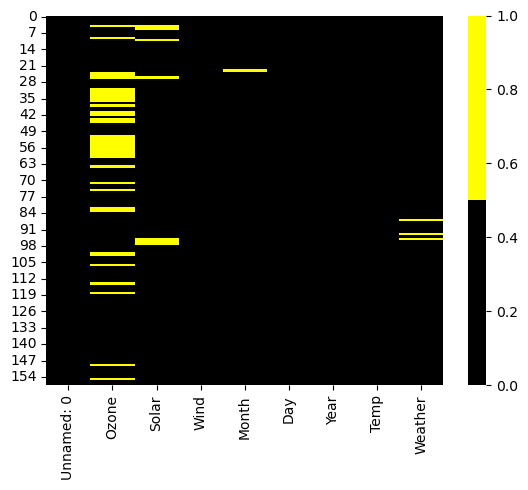

In [11]:
cols = d1.columns
colors = ['black','yellow']
sns.heatmap(d1[cols].isnull(),cmap=sns.color_palette(colors),cbar = True)

In [12]:
median_ozone = d1["Ozone"].median()
mean_ozone = d1["Ozone"].mean()
print("Median of Ozone: ",median_ozone)
print("Mean of Ozone: ",mean_ozone)

Median of Ozone:  30.5
Mean of Ozone:  41.583333333333336


In [13]:
d1['ozone'] = d1['Ozone'].fillna(median_ozone)
d1.isnull().sum()

Unnamed: 0     0
Ozone         38
Solar          7
Wind           0
Month          1
Day            0
Year           0
Temp           0
Weather        3
ozone          0
dtype: int64

In [14]:
d1['Ozone'] = d1['Ozone'].fillna(median_ozone)
d1.isnull().sum()

Unnamed: 0    0
Ozone         0
Solar         7
Wind          0
Month         1
Day           0
Year          0
Temp          0
Weather       3
ozone         0
dtype: int64

In [15]:
print(d1["Weather"].value_counts())
mode_weather=d1["Weather"].mode()[0]
print(mode_weather)

Weather
S     59
C     49
PS    47
Name: count, dtype: int64
S


In [34]:
d1["Weather"]=d1["Weather"].fillna(mode_weather)
d1.isnull().sum()

Unnamed: 0    0
Ozone         0
Solar         7
Wind          0
Month         1
Day           0
Year          0
Temp          0
Weather       0
ozone         0
dtype: int64

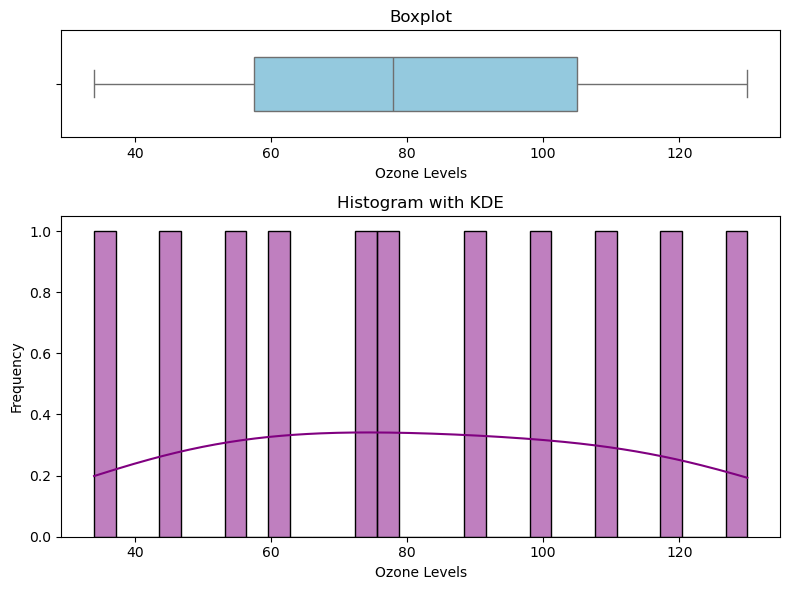

In [44]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})
sns.boxplot(x=d1["Ozone"], ax=axes[0], color='skyblue', width=0.5)
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")
sns.histplot(d1["Ozone"], kde=True, ax=axes[1], color='purple', bins=30) 
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()
